<a href="https://colab.research.google.com/github/matt-balda/pln-2023/blob/master/textual_data_visualization_03_november.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim import models
nltk.download("punkt")
nltk.download("stopwords")

In [ ]:
!pip install BERTopic
!pip install sentence_transformers
!pip install wordcloud

In [64]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import re
from operator import itemgetter
import pandas as pd
from matplotlib import pyplot as plt

from collections import Counter

from nltk.util import ngrams

In [65]:
dataset = '''
As redes sociais transformaram radicalmente a maneira como nos comunicamos e interagimos uns com os outros. Elas se tornaram uma parte integral da vida moderna, afetando desde o modo como nos relacionamos até como consumimos informações. No entanto, o impacto das redes sociais na sociedade é uma faca de dois gumes, com benefícios e desafios consideráveis.

Para começar, as redes sociais têm o poder de conectar pessoas de todo o mundo, independentemente da distância geográfica. Isso é notável para a formação de comunidades online, permitindo que indivíduos com interesses comuns compartilhem informações e experiências. Além disso, as redes sociais têm sido uma plataforma crucial para a disseminação de informações e conscientização sobre questões sociais, políticas e ambientais. Elas desempenharam um papel significativo na organização de movimentos sociais e na promoção de mudanças.

No entanto, o lado negativo das redes sociais não pode ser ignorado. Uma preocupação principal é a privacidade. Muitas pessoas compartilham informações pessoais sem pensar nas implicações de longo prazo. A coleta de dados por empresas de tecnologia levanta questões sobre a segurança e a privacidade das informações dos usuários. Além disso, as redes sociais podem criar um ambiente tóxico de cyberbullying, assédio e disseminação de informações falsas.

A dependência das redes sociais também é um problema crescente. Muitos indivíduos passam horas por dia navegando em plataformas como Facebook, Instagram e Twitter, o que pode afetar negativamente sua saúde mental e bem-estar. O constante desejo de validação social, muitas vezes traduzido em "curtidas" e "seguidores", pode criar ansiedade e depressão.

Outro desafio é a disseminação de desinformação. As redes sociais se tornaram um terreno fértil para a propagação de notícias falsas e teorias da conspiração. A falta de verificação de fatos e a rápida disseminação de informações errôneas podem influenciar significativamente a opinião pública e afetar processos políticos.

Além disso, as redes sociais podem ter um impacto prejudicial nas relações interpessoais. À medida que as pessoas passam mais tempo online, a comunicação face a face diminui, o que pode afetar a qualidade e a profundidade de nossas conexões humanas. Há uma tendência crescente de comparar-se aos outros com base no que é exibido nas redes sociais, o que pode levar à insatisfação e à inveja.

Para lidar com esses desafios, é essencial promover a alfabetização digital e a conscientização sobre o uso responsável das redes sociais. As plataformas de mídia social também têm a responsabilidade de melhorar a moderação de conteúdo e limitar a disseminação de informações falsas. Além disso, é importante para os indivíduos estabelecerem limites para o tempo gasto online e cultivarem relacionamentos offline significativos.

Em resumo, as redes sociais têm um impacto profundo na sociedade contemporânea, com benefícios e desafios significativos. Elas têm o potencial de conectar pessoas, criar conscientização e promover a mudança, mas também trazem questões de privacidade, dependência, desinformação e impacto nas relações interpessoais. É fundamental encontrar um equilíbrio entre aproveitar os benefícios das redes sociais e mitigar seus efeitos negativos.
'''

In [66]:
def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(list(zip(wordlist,wordfreq)))

In [67]:
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [68]:
# Normalização
dataset = dataset.lower()
print(len(dataset))

# Tokenização
datasetTokenize = word_tokenize(dataset)
print(len(datasetTokenize))

stop_words = set(stopwords.words('portuguese'))
# Remoção dos stopwords
noStopWords = [word for word in datasetTokenize if word not in stop_words]
print(len(noStopWords))

noNumbers = [p for p in noStopWords if p.isalnum()]
print(len(noNumbers))

# Remoção de pontuações, números
palavrasSemPontuacao = [p for p in noNumbers if p not in string.punctuation]

textUni = " ".join(palavrasSemPontuacao)

print(palavrasSemPontuacao)
print(len(palavrasSemPontuacao))

3289
547
353
293
['redes', 'sociais', 'transformaram', 'radicalmente', 'maneira', 'comunicamos', 'interagimos', 'uns', 'outros', 'tornaram', 'parte', 'integral', 'vida', 'moderna', 'afetando', 'desde', 'modo', 'relacionamos', 'consumimos', 'informações', 'entanto', 'impacto', 'redes', 'sociais', 'sociedade', 'faca', 'dois', 'gumes', 'benefícios', 'desafios', 'consideráveis', 'começar', 'redes', 'sociais', 'têm', 'poder', 'conectar', 'pessoas', 'todo', 'mundo', 'independentemente', 'distância', 'geográfica', 'notável', 'formação', 'comunidades', 'online', 'permitindo', 'indivíduos', 'interesses', 'comuns', 'compartilhem', 'informações', 'experiências', 'além', 'disso', 'redes', 'sociais', 'têm', 'sido', 'plataforma', 'crucial', 'disseminação', 'informações', 'conscientização', 'sobre', 'questões', 'sociais', 'políticas', 'ambientais', 'desempenharam', 'papel', 'significativo', 'organização', 'movimentos', 'sociais', 'promoção', 'mudanças', 'entanto', 'lado', 'negativo', 'redes', 'sociai

In [69]:
modelo = BERTopic(language="portuguese", verbose=True,
                  top_n_words=15, min_topic_size=10, nr_topics=20,
                  vectorizer_model=CountVectorizer(ngram_range=(1,3),
                  stop_words=stopwords.words("portuguese"), min_df=10))

In [ ]:
# poucos tokens para usar o modelo BERTOpic
topicos, probabilidades = modelo.fit_transform(textUni)

In [ ]:
dictionary = wordListToFreqDict(palavrasSemPontuacao)
sorteddict = sortFreqDict(dictionary)

for s in sorteddict: print(str(s))

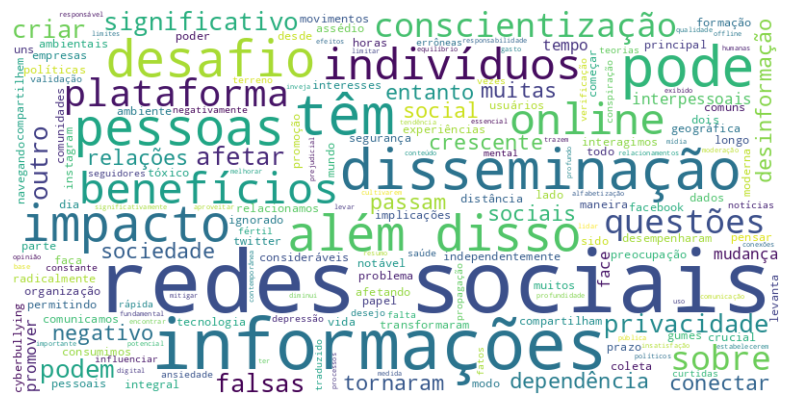

In [71]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(textUni)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

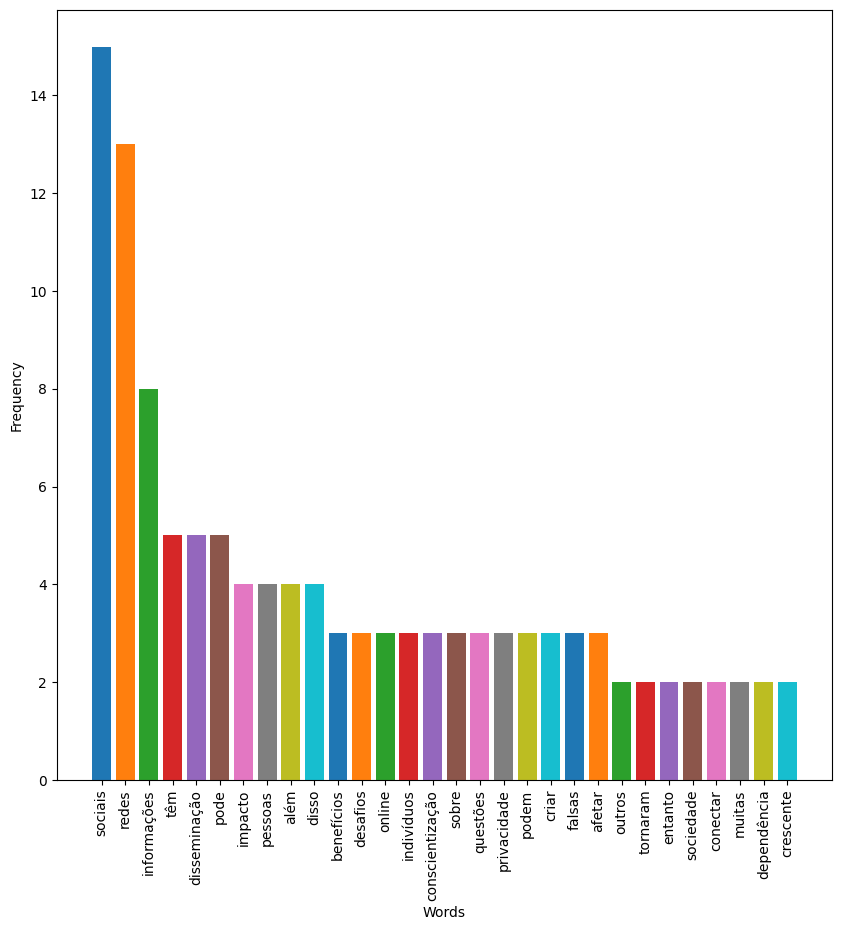

In [72]:
frequency = {}

for word in palavrasSemPontuacao:
    count = frequency.get(word, 0)
    frequency[word] = count + 1

collection = sorted(frequency.items(), key=itemgetter(1), reverse = True)

plt.figure(figsize=(10,10))
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90)

for word , freq in collection[:30]:
    plt.bar(word, freq)
plt.show()

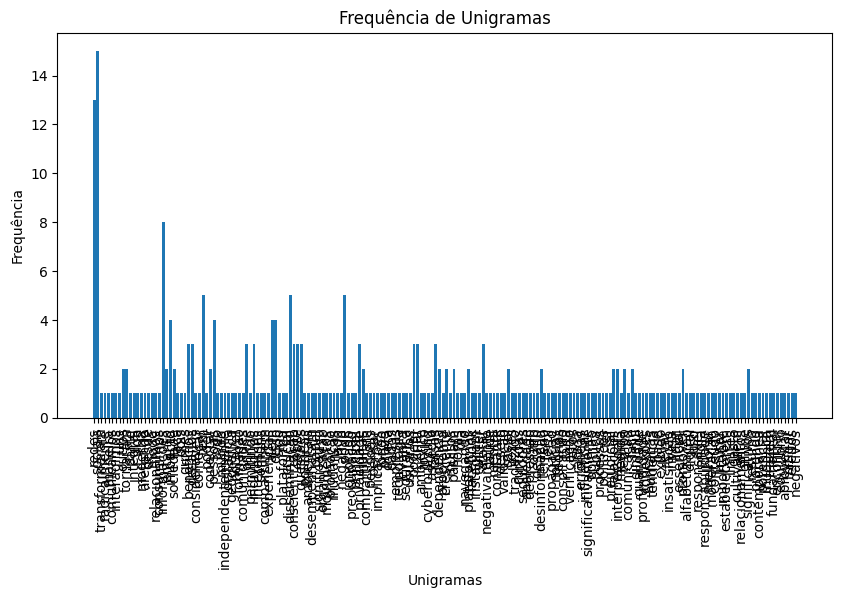

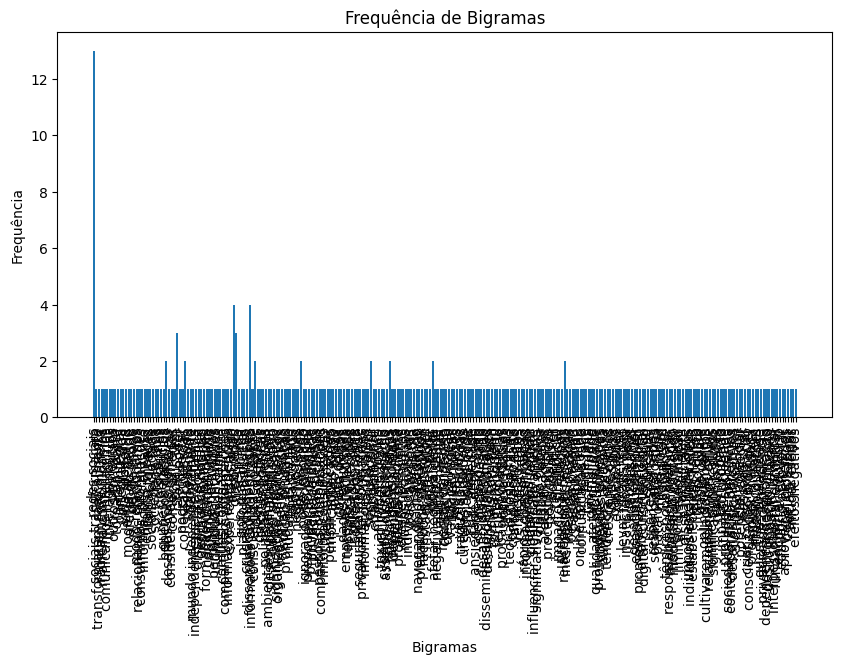

In [73]:
unigrams = palavrasSemPontuacao
bigrams = list(ngrams(palavrasSemPontuacao, 2))

unigram_counts = Counter(unigrams)
bigram_counts = Counter(bigrams)

plt.figure(figsize=(10, 5))
plt.bar(unigram_counts.keys(), unigram_counts.values())
plt.xlabel('Unigramas')
plt.ylabel('Frequência')
plt.title('Frequência de Unigramas')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 5))
plt.bar([" ".join(bigram) for bigram in bigram_counts.keys()], bigram_counts.values())
plt.xlabel('Bigramas')
plt.ylabel('Frequência')
plt.title('Frequência de Bigramas')
plt.xticks(rotation=90)
plt.show()